In [1]:
from nermodel import *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
import pickle

In [3]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [4]:
import json

with open('./Task2_data/ATE_train.json', 'r') as file:
    train_data = json.load(file)
with open('./Task2_data/ATE_val.json', 'r') as file:
    val_data = json.load(file)
with open('./Task2_data/ATE_test.json', 'r') as file:
    test_data = json.load(file)

In [5]:
data_train = []
labels_train = []
for sample in train_data.items():
    data_train.append(sample[1]['text'].split())
    labels_train.append(sample[1]['labels'])

data_val = []
labels_val = []
for sample in val_data.items():
    data_val.append(sample[1]['text'].split())
    labels_val.append(sample[1]['labels'])

data_test = []
labels_test = []
for sample in test_data.items():
    data_test.append(sample[1]['text'].split())
    labels_test.append(sample[1]['labels'])

In [6]:
num_classes = len(list(set(list(chain(*labels_train)))))

Epoch 1/20
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15/15 [==============================] - 19s 1s/step - loss: 0.5641 - macro_f1: 0.6842 - accuracy: 0.9073 - val_loss: 0.2969 - val_macro_f1: 0.7220 - val_accuracy: 0.9646
Epoch 2/20
15/15 [==============================] - 15s 1s/step - loss: 0.2660 - macro_f1: 0.7227 - accuracy: 0.9647 - val_loss: 0.2652 - val_macro_f1: 0.7214 - val_accuracy: 0.9638
Epoch 3/20
15/15 [==============================] - 15s 1s/step - loss: 0.2469 - macro_f1: 0.7214 - accuracy: 0.9650 - val_loss: 0.2443 - val_macro_f1: 0.7231 - val_accuracy: 0.9662
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.2307 - macro_f1: 0.7233 - accuracy: 0.9660 - val_loss: 0.2412 - val_macro_f1: 0.7221 - val_accuracy: 0.9652
Epoch 5/20
15/15 [==============================] - 15s 1s/step - loss: 0.2321 - macro_f1: 0.7221 - accuracy: 0.9614 - val_loss: 0.243

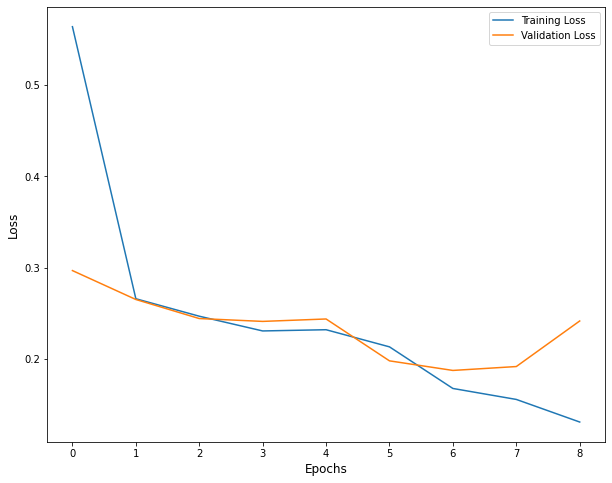

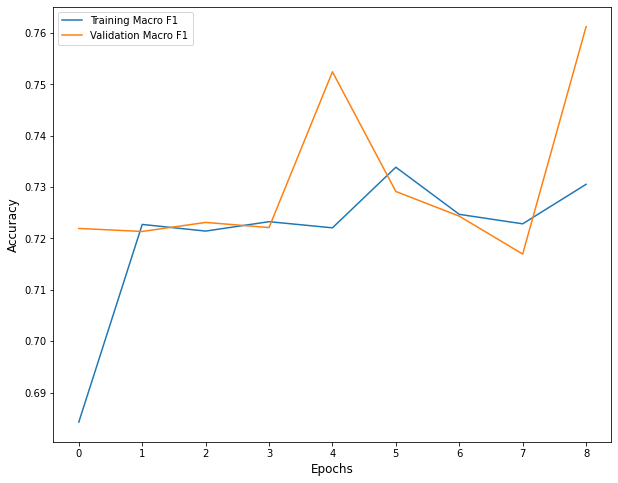

In [7]:
bilstm_crf_w2v = BiLSTM_CRF_NERModel(num_classes,embed='word2vec')
bilstm_crf_w2v.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64, patience=2)

Epoch 1/20
15/15 [==============================] - 16s 1s/step - loss: 0.5786 - macro_f1: 0.6936 - accuracy: 0.9226 - val_loss: 0.2286 - val_macro_f1: 0.7314 - val_accuracy: 0.9739
Epoch 2/20
15/15 [==============================] - 16s 1s/step - loss: 0.2375 - macro_f1: 0.7330 - accuracy: 0.9729 - val_loss: 0.2078 - val_macro_f1: 0.7382 - val_accuracy: 0.9747
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.2256 - macro_f1: 0.7510 - accuracy: 0.9714 - val_loss: 0.2385 - val_macro_f1: 0.7754 - val_accuracy: 0.9686
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.2256 - macro_f1: 0.7347 - accuracy: 0.9686 - val_loss: 0.2058 - val_macro_f1: 0.7313 - val_accuracy: 0.9747
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.2141 - macro_f1: 0.7315 - accuracy: 0.9736 - val_loss: 0.2075 - val_macro_f1: 0.7313 - val_accuracy: 0.9747
Epoch 6/20
15/15 [==============================] - 16s 1s/step - loss: 0.2138 - macro_f1:

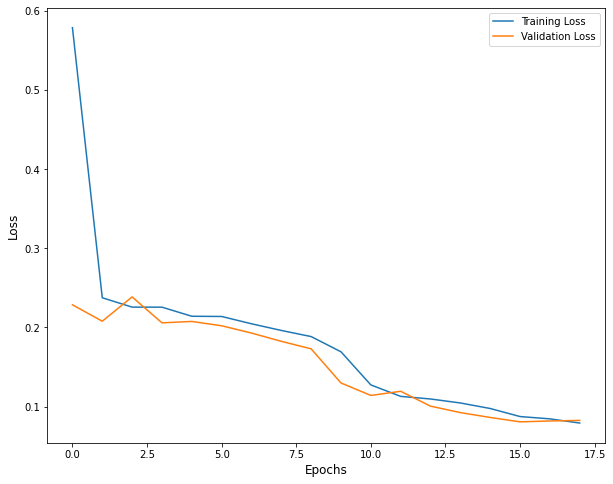

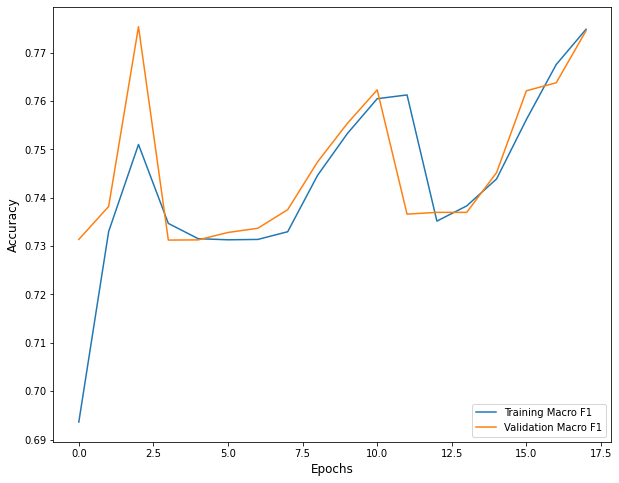

In [10]:
bilstm_crf_glove = BiLSTM_CRF_NERModel(num_classes,embed='glove')
bilstm_crf_glove.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64, patience=2)

Epoch 1/20
15/15 [==============================] - 16s 1s/step - loss: 0.5040 - macro_f1: 0.6795 - accuracy: 0.8997 - val_loss: 0.1483 - val_macro_f1: 0.7303 - val_accuracy: 0.9745
Epoch 2/20
15/15 [==============================] - 17s 1s/step - loss: 0.1343 - macro_f1: 0.7301 - accuracy: 0.9735 - val_loss: 0.1197 - val_macro_f1: 0.7306 - val_accuracy: 0.9748
Epoch 3/20
15/15 [==============================] - 17s 1s/step - loss: 0.1166 - macro_f1: 0.7297 - accuracy: 0.9736 - val_loss: 0.1055 - val_macro_f1: 0.7306 - val_accuracy: 0.9748
Epoch 4/20
15/15 [==============================] - 19s 1s/step - loss: 0.1059 - macro_f1: 0.7297 - accuracy: 0.9736 - val_loss: 0.1168 - val_macro_f1: 0.7306 - val_accuracy: 0.9748
Epoch 5/20
15/15 [==============================] - 18s 1s/step - loss: 0.0994 - macro_f1: 0.7293 - accuracy: 0.9736 - val_loss: 0.0914 - val_macro_f1: 0.7306 - val_accuracy: 0.9748
Epoch 6/20
15/15 [==============================] - 17s 1s/step - loss: 0.0915 - macro_f1:

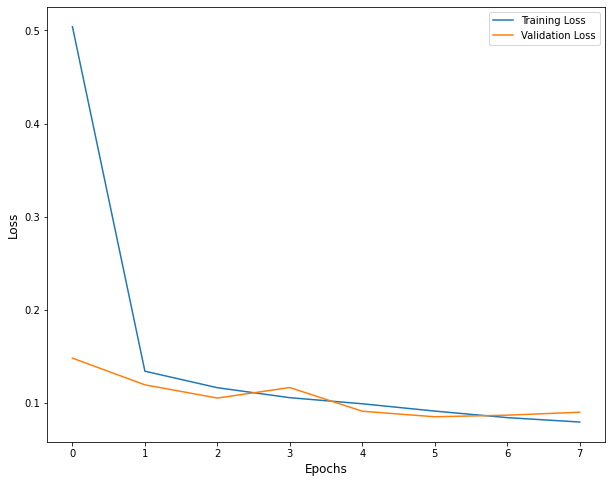

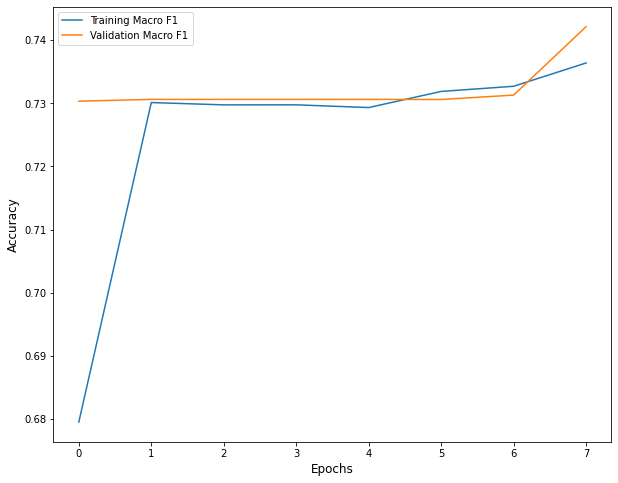

In [12]:
bilstm_crf_ft = BiLSTM_CRF_NERModel(num_classes,embed='fasttext')
bilstm_crf_ft.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64, patience=2)